<a href="https://colab.research.google.com/github/aditi-raj/Zeotap_intern/blob/main/Exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [49]:

class EcommerceEDA:
    def __init__(self, customers_path, products_path, transactions_path):
        self.customers_df = pd.read_csv(customers_path, parse_dates=['SignupDate'])
        self.products_df = pd.read_csv(products_path)
        self.transactions_df = pd.read_csv(transactions_path, parse_dates=['TransactionDate'])

    def analyze_customers(self):
        print("\nCUSTOMERS ANALYSIS")

        print("\nCustomer Distribution by Region:")
        print(self.customers_df['Region'].value_counts())

        self.customers_df['SignupYear'] = self.customers_df['SignupDate'].dt.year
        self.customers_df['SignupMonth'] = self.customers_df['SignupDate'].dt.month

        plt.figure(figsize=(12, 6))
        self.customers_df['SignupDate'].dt.to_period('M').value_counts().sort_index().plot(kind='bar')
        plt.title('Customer Signups by Month')
        plt.xticks(rotation=45)
        plt.tight_layout()

        plt.figure(figsize=(8, 8))
        self.customers_df['Region'].value_counts().plot(kind='pie', autopct='%1.1f%%')
        plt.title('Customer Distribution by Region')
        plt.tight_layout()

        return self.customers_df.describe(include='all')

    def analyze_products(self):
        print("\n PRODUCTS ANALYSIS ")

        # Price statistics by category
        price_stats = self.products_df.groupby('Category')['Price'].agg(['mean', 'min', 'max', 'count'])
        print("\nPrice Statistics by Category:")
        print(price_stats)

        # Plot price distribution
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='Category', y='Price', data=self.products_df)
        plt.title('Price Distribution by Category')
        plt.xticks(rotation=45)
        plt.tight_layout()

        # Product distribution by category
        plt.figure(figsize=(10, 6))
        self.products_df['Category'].value_counts().plot(kind='bar')
        plt.title('Number of Products by Category')
        plt.tight_layout()

        return self.products_df.describe()

    def analyze_transactions(self):
        print("\n TRANSACTIONS ANALYSIS ")

        trans_stats = {
            'Total Transactions': len(self.transactions_df),
            'Total Revenue': self.transactions_df['TotalValue'].sum(),
            'Average Transaction Value': self.transactions_df['TotalValue'].mean(),
            'Most Common Quantity': self.transactions_df['Quantity'].mode()[0]
        }
        print("\nTransaction Statistics:")
        for key, value in trans_stats.items():
            print(f"{key}: {value}")

        self.transactions_df['TransactionMonth'] = self.transactions_df['TransactionDate'].dt.to_period('M')
        monthly_sales = self.transactions_df.groupby('TransactionMonth')['TotalValue'].sum()

        plt.figure(figsize=(12, 6))
        monthly_sales.plot(kind='line')
        plt.title('Monthly Sales Trend')
        plt.xticks(rotation=45)
        plt.tight_layout()

        return self.transactions_df.describe()

    def plot_category_preferences(self, merged_df):
        category_region_pref = pd.crosstab(
            index=merged_df['Region'],
            columns=merged_df['Category'],
            values=merged_df['Quantity'],
            aggfunc='sum'
        ).apply(lambda x: x/x.sum() * 100, axis=1).round(2)

        plt.figure(figsize=(12, 6))
        ax = category_region_pref.plot(kind='bar', stacked=True)
        plt.title('Category Preferences by Region')
        plt.xlabel('Region')
        plt.ylabel('Percentage of Total Purchases')
        plt.legend(title='Category', bbox_to_anchor=(1.15, 1))
        plt.subplots_adjust(right=0.85)
        plt.show()

    def combined_analysis(self):
        """Perform combined analysis across all datasets"""
        print("\n COMBINED ANALYSIS ")

        # Merge datasets
        merged_df = self.transactions_df.merge(self.customers_df, on='CustomerID')\
                                     .merge(self.products_df, on='ProductID')
        category_region_pref = pd.crosstab(
        index=merged_df['Region'],
        columns=merged_df['Category'],
        values=merged_df['Quantity'],
        aggfunc='sum'
        ).apply(lambda x: x/x.sum() * 100, axis=1).round(2)

        # Sales by region and category
        region_category_sales = merged_df.groupby(['Region', 'Category'])['TotalValue'].sum().unstack()
        print("\nSales by Region and Category:")
        print(region_category_sales)

        # Customer purchase frequency
        customer_frequency = merged_df.groupby('CustomerID').size()
        plt.figure(figsize=(10, 6))
        sns.histplot(customer_frequency, bins=30)
        plt.title('Distribution of Purchases per Customer')
        plt.xlabel('Number of Purchases')
        plt.tight_layout()

        # Average spend by region
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Region', y='TotalValue', data=merged_df)
        plt.title('Average Transaction Value by Region')
        plt.xticks(rotation=45)
        plt.tight_layout()

        # Product category popularity by region
        category_region = pd.crosstab(merged_df['Region'], merged_df['Category'])
        plt.figure(figsize=(12, 8))
        sns.heatmap(category_region, annot=True, fmt='d', cmap='YlOrRd')
        plt.title('Product Category Popularity by Region')
        plt.tight_layout()
        plt.show()

        self.plot_category_preferences(merged_df)

        return merged_df.describe()




In [50]:
analyzer = EcommerceEDA(
    customers_path='Customers.csv',
    products_path='Products.csv',
    transactions_path='Transactions.csv'
)


CUSTOMERS ANALYSIS

Customer Distribution by Region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

 PRODUCTS ANALYSIS 

Price Statistics by Category:
                   mean    min     max  count
Category                                     
Books        292.212308  33.59  497.76     26
Clothing     263.720000  18.82  481.78     25
Electronics  275.353462  16.08  459.86     26
Home Decor   235.020000  41.18  454.53     23

 TRANSACTIONS ANALYSIS 

Transaction Statistics:
Total Transactions: 1000
Total Revenue: 689995.56
Average Transaction Value: 689.9955600000001
Most Common Quantity: 4


,TransactionDate,Quantity,TotalValue,Price
count,1000,1000.000000,1000.000000,1000.00000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000
std,NaN,1.117981,493.144478,140.73639


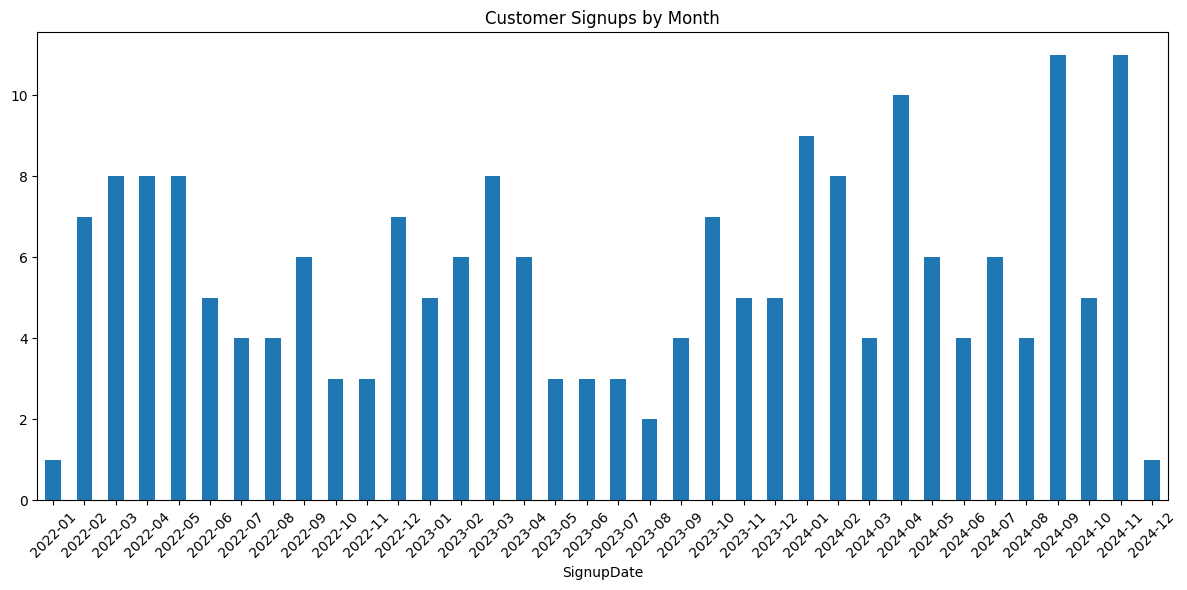

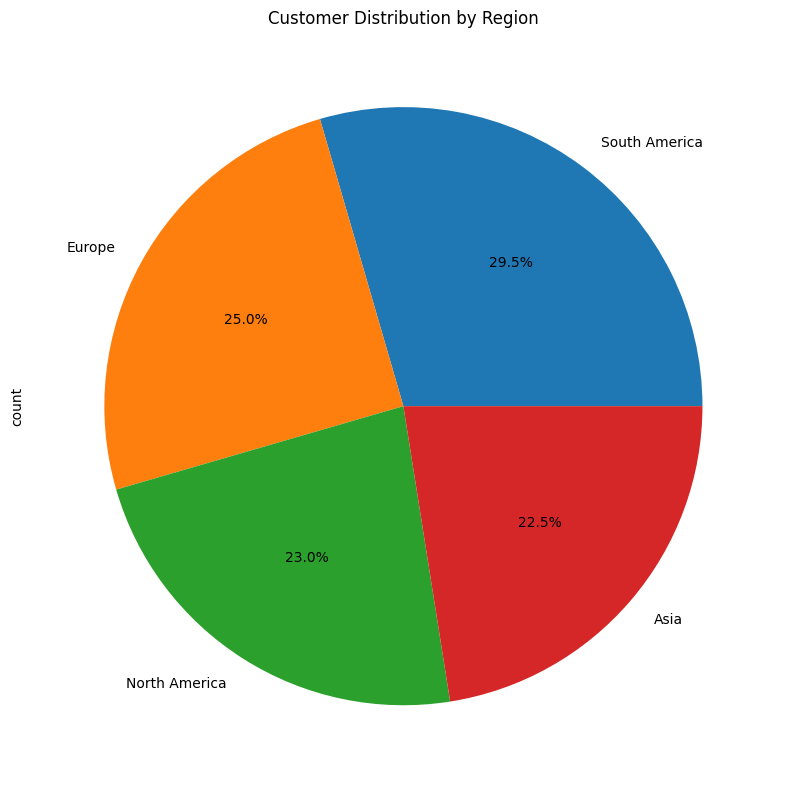

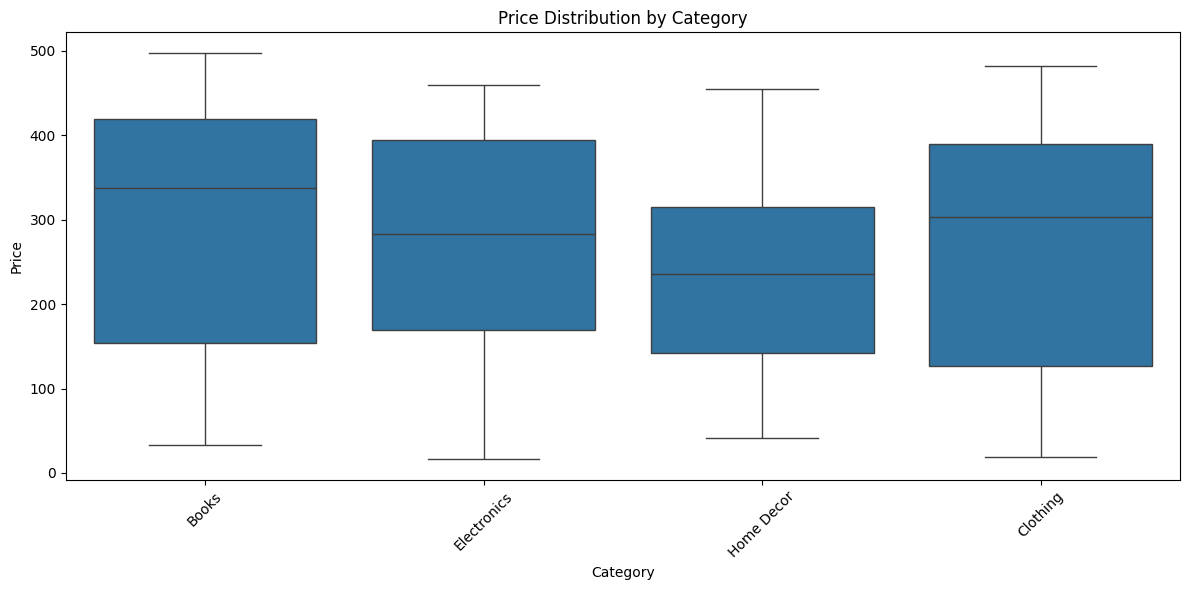

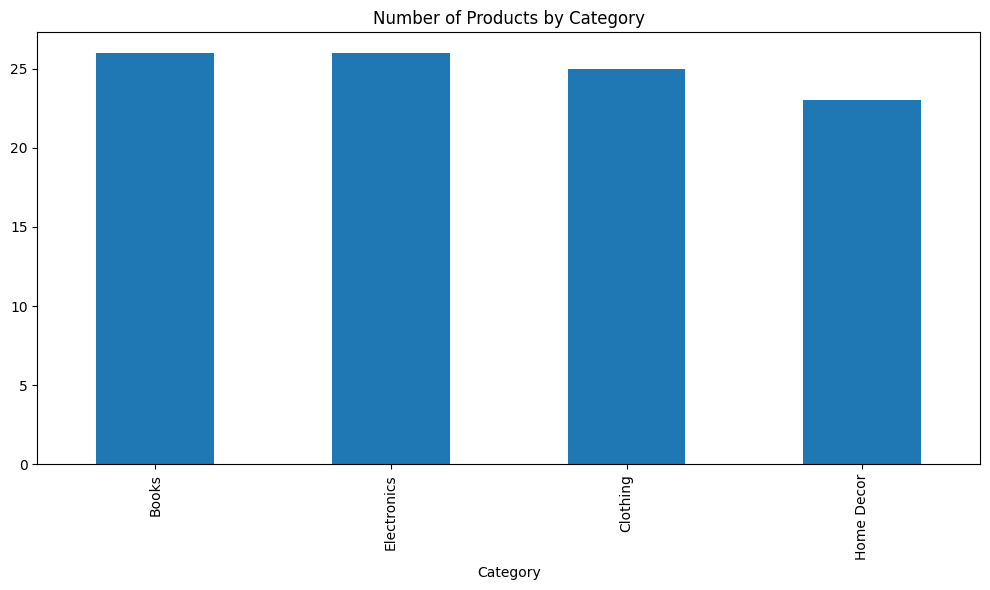

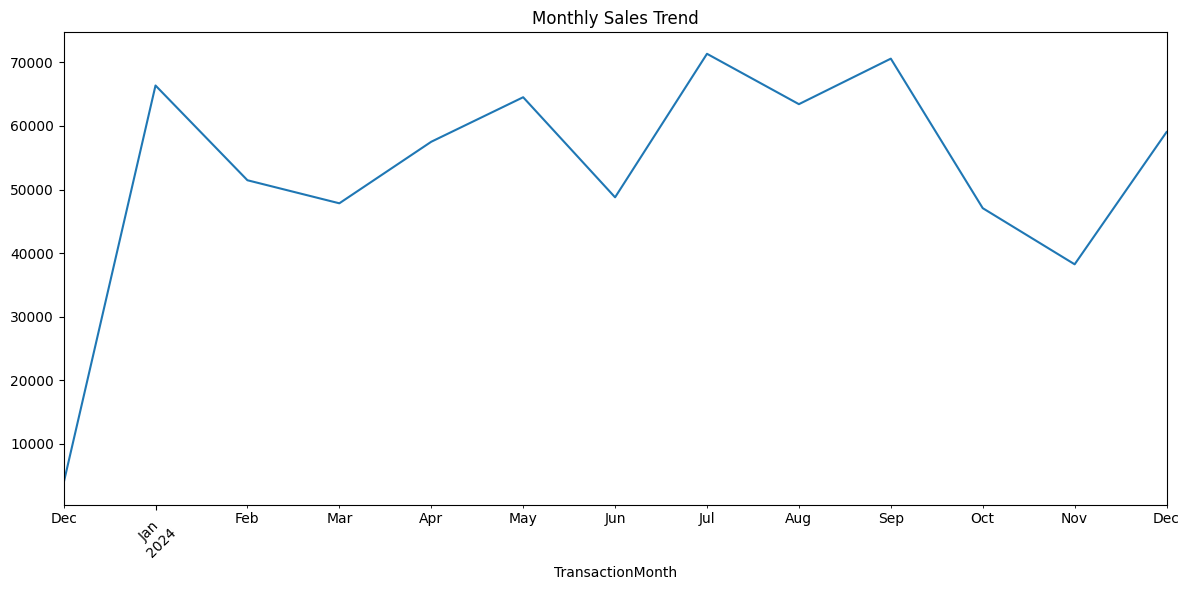

In [51]:
analyzer.analyze_customers()
analyzer.analyze_products()
analyzer.analyze_transactions()


 COMBINED ANALYSIS 

Sales by Region and Category:
Category          Books  Clothing  Electronics  Home Decor
Region                                                    
Asia           33119.03  49353.09     35658.15    33944.70
Europe         47464.42  36335.59     41562.60    40892.02
North America  41811.99  38038.49     44716.43    27746.49
South America  69752.03  42443.49     58846.32    48310.72


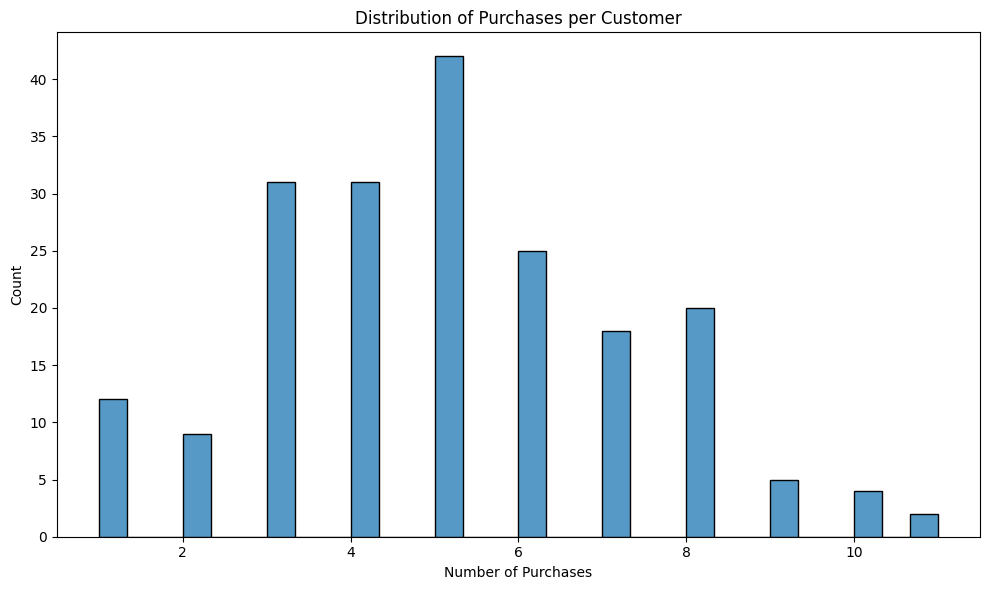

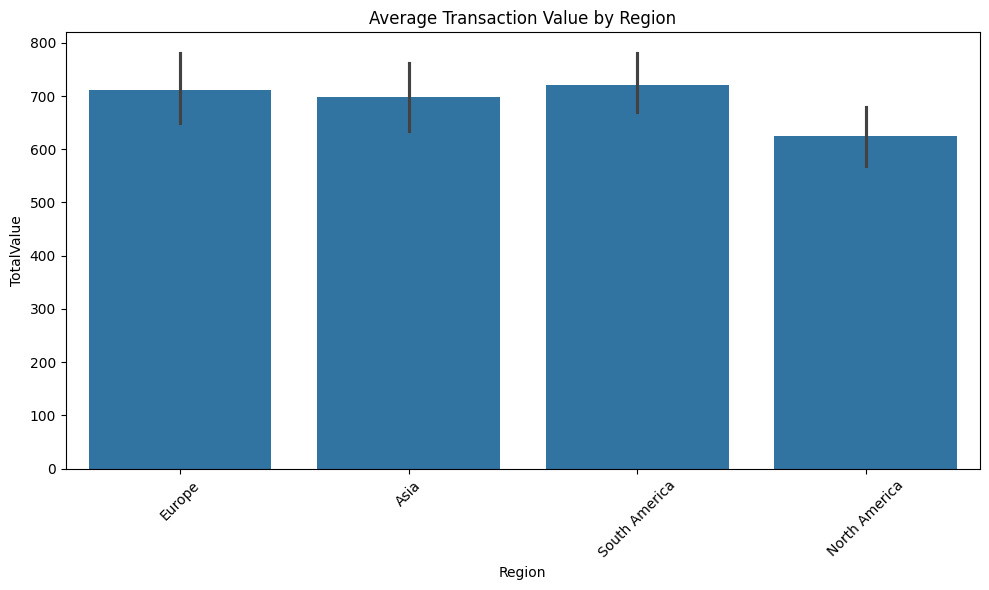

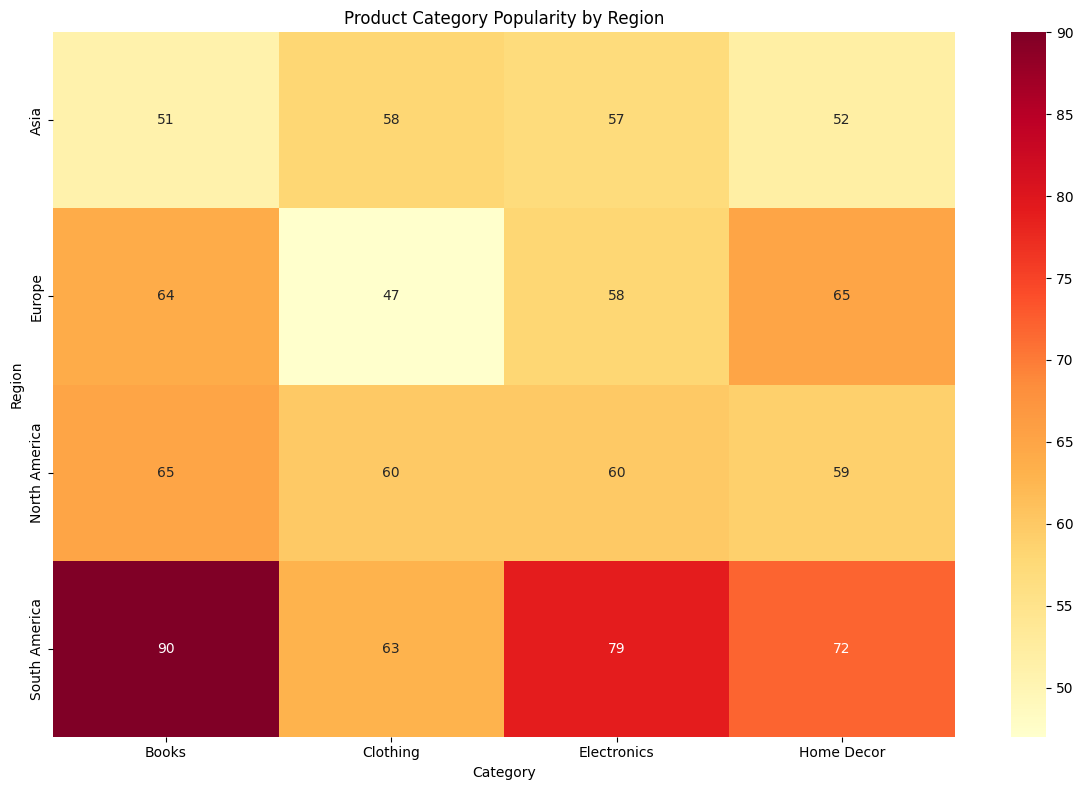

<Figure size 1200x600 with 0 Axes>

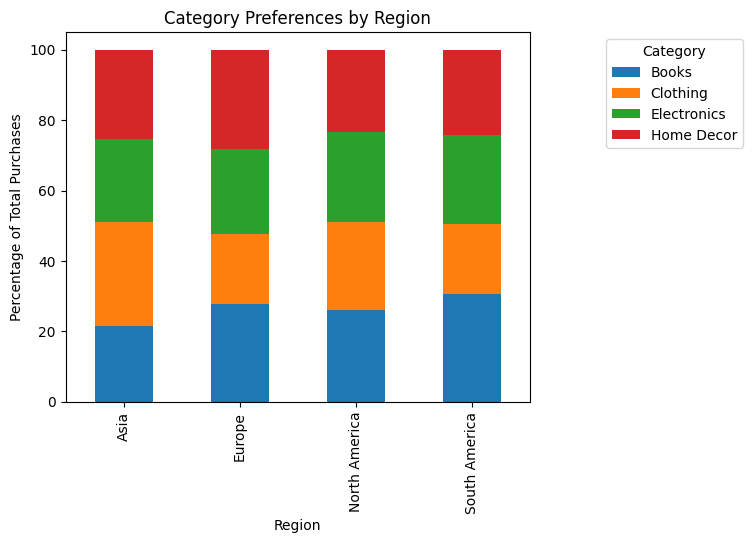

,TransactionDate,Quantity,TotalValue,Price_x,SignupDate,SignupYear,SignupMonth,Price_y
count,1000,1000.000000,1000.000000,1000.00000,1000,1000.000000,1000.000000,1000.00000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407,2023-07-09 02:49:55.199999744,2023.055000,6.120000,272.55407
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000,2022-01-22 00:00:00,2022.000000,1.000000,16.08000
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000,2022-09-17 12:00:00,2022.000000,3.000000,147.95000
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000,2023-07-23 00:00:00,2023.000000,5.000000,299.93000
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000,2024-04-12 00:00:00,2024.000000,9.000000,404.40000
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000,2024-12-28 00:00:00,2024.000000,12.000000,497.76000
std,NaN,1.117981,493.144478,140.73639,NaN,0.846576,3.422472,140.73639


In [52]:
analyzer.combined_analysis()

**Task 2**: Lookalike Model

In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

class CustomerLookalikeModel:
    def __init__(self, customers_df, products_df, transactions_df):
        self.customers_df = customers_df
        self.products_df = products_df
        self.transactions_df = transactions_df
        self.feature_matrix = None
        self.similarity_matrix = None

    def preprocess_data(self):
        customer_metrics = self.transactions_df.groupby('CustomerID').agg({
            'TotalValue': ['sum', 'mean', 'count'],
            'Quantity': ['sum', 'mean']
        }).round(2)

        customer_metrics.columns = [
            'total_spend', 'avg_transaction_value', 'transaction_count',
            'total_items', 'avg_items_per_transaction'
        ]

        category_preferences = self.get_category_preferences()

        self.feature_matrix = customer_metrics.join(category_preferences)

        region_dummies = pd.get_dummies(self.customers_df.set_index('CustomerID')['Region'],
                                      prefix='region')
        self.feature_matrix = self.feature_matrix.join(region_dummies)

        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(self.feature_matrix)
        self.feature_matrix = pd.DataFrame(scaled_features,
                                         index=self.feature_matrix.index,
                                         columns=self.feature_matrix.columns)

    def get_category_preferences(self):
        tx_with_categories = self.transactions_df.merge(
            self.products_df[['ProductID', 'Category']],
            on='ProductID'
        )

        category_spend = pd.crosstab(
            tx_with_categories['CustomerID'],
            tx_with_categories['Category'],
            values=tx_with_categories['TotalValue'],
            aggfunc='sum'
        ).fillna(0)

        category_preferences = category_spend.div(category_spend.sum(axis=1), axis=0)
        category_preferences.columns = ['pref_' + col.lower() for col in category_preferences.columns]

        return category_preferences

    def calculate_similarity(self):
        self.similarity_matrix = pd.DataFrame(
            cosine_similarity(self.feature_matrix),
            index=self.feature_matrix.index,
            columns=self.feature_matrix.index
        )

    def get_lookalikes(self, customer_id, n=3):
        if customer_id not in self.similarity_matrix.index:
            return None

        similarities = self.similarity_matrix[customer_id].sort_values(ascending=False)

        lookalikes = similarities[similarities.index != customer_id].head(n)

        return lookalikes

    def generate_lookalike_recommendations(self, customer_ids, n=3):
        recommendations = {}

        for cust_id in customer_ids:
            lookalikes = self.get_lookalikes(cust_id, n)
            if lookalikes is not None:
                recommendations[cust_id] = {
                    'lookalikes': lookalikes.index.tolist(),
                    'similarity_scores': lookalikes.values.tolist()
                }

        return recommendations

def save_recommendations_to_csv(recommendations, output_file):
    customer_ids = []
    lookalike_lists = []
    score_lists = []

    for cust_id, data in recommendations.items():
        customer_ids.append(cust_id)
        lookalike_str = ','.join(data['lookalikes'])
        score_str = ','.join([f"{score:.4f}" for score in data['similarity_scores']])
        lookalike_lists.append(lookalike_str)
        score_lists.append(score_str)

    results_df = pd.DataFrame({
        'CustomerID': customer_ids,
        'Lookalikes': lookalike_lists,
        'SimilarityScores': score_lists
    })

    results_df.to_csv(output_file, index=False)

if __name__ == "__main__":
    customers_df = pd.read_csv('Customers.csv')
    products_df = pd.read_csv('Products.csv')
    transactions_df = pd.read_csv('Transactions.csv')

    model = CustomerLookalikeModel(customers_df, products_df, transactions_df)
    model.preprocess_data()
    model.calculate_similarity()

    target_customers = [f"C{str(i).zfill(4)}" for i in range(1, 21)]
    recommendations = model.generate_lookalike_recommendations(target_customers)

    save_recommendations_to_csv(recommendations, 'Lookalike.csv')
